# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Getting the Data

In this section we will use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [Install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**



import pandas_datareader.data as web

import datetime

start = datetime.datetime(2006,1,1)

end = datetime.datetime(2016,1,1)

f = web.DataReader('F', 'google', start, end)

#Given that Google Finance API has not been stable since late 2017, 
#we are going to use the same data we were trying to download but in csv format.

In [19]:
bank_stocks = pd.read_pickle('all_banks')

In [21]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [34]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

# EDA

Let's explore the data a bit! Before continuing, The documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [38]:
for tick in tickers:
    print(tick,bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [40]:
bank_stocks.xs('Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [41]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [45]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [46]:
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

** Creating a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

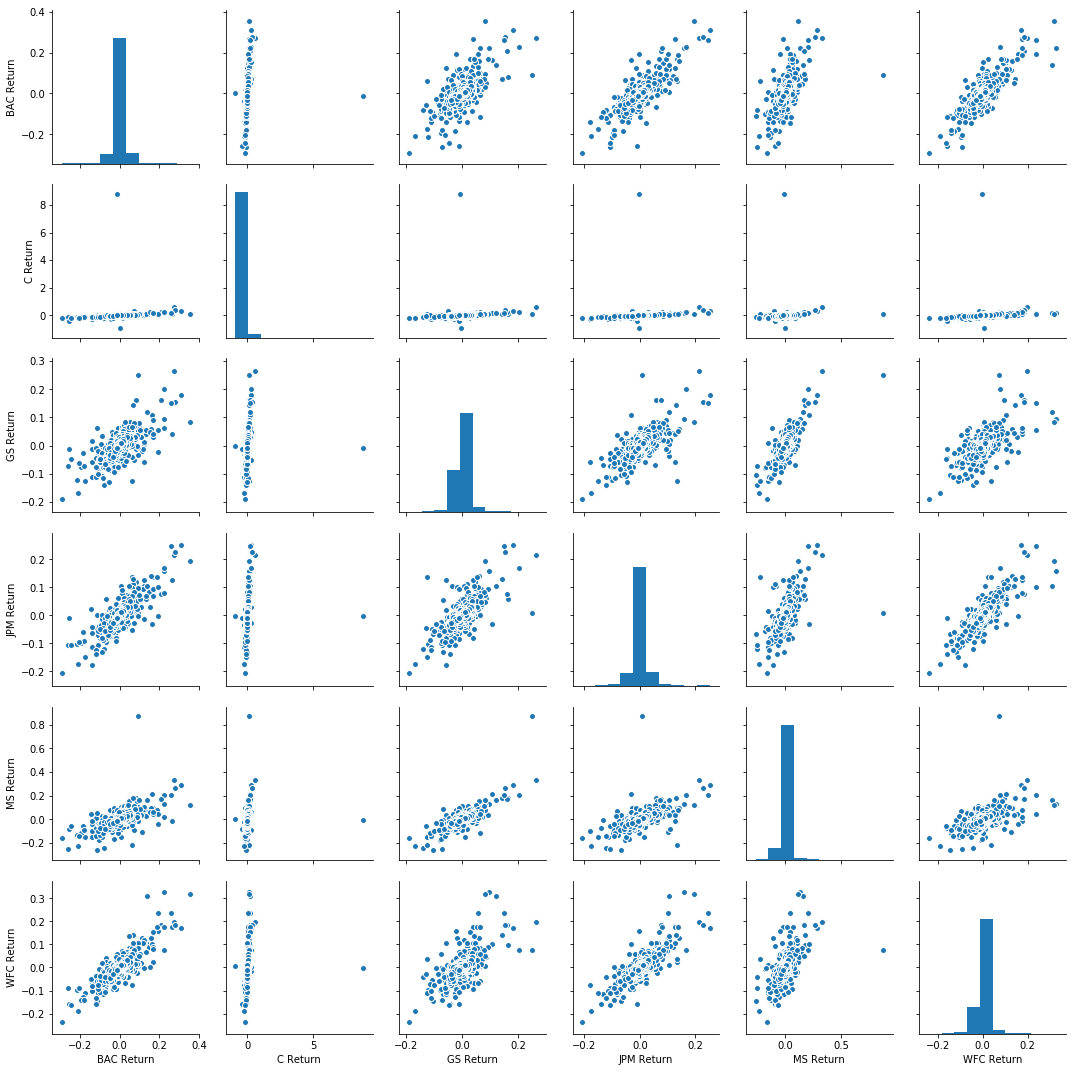

In [49]:
sns.pairplot(returns[1:])

* [See for details about Citigroup behavior....](https://www.reuters.com/article/us-citigroup/citigroup-gets-massive-government-bailout-idUSTRE4AJ45G20081124)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [92]:
label_returns = list(returns.columns)

In [96]:
def minVal(x):
    return pd.Series(index=['min','idx'],data=[x.min(),x.idxmin()])
def maxVal(x):
    return pd.Series(index=['max','idx'],data=[x.max(),x.idxmax()])

x = returns.apply(minVal)
y = returns.apply(maxVal)


In [98]:
x ## Worst day of returns

BAC Return             C Return            GS Return  \
min            -0.289694            -0.899107            -0.189596   
idx  2009-01-20 00:00:00  2011-05-06 00:00:00  2009-01-20 00:00:00   

              JPM Return            MS Return           WFC Return  
min            -0.207274            -0.258929            -0.238223  
idx  2009-01-20 00:00:00  2008-10-09 00:00:00  2009-01-20 00:00:00

In [100]:
y ## Best day of returns

BAC Return             C Return            GS Return  \
max             0.352691              8.76991             0.264678   
idx  2009-04-09 00:00:00  2011-05-09 00:00:00  2008-11-24 00:00:00   

              JPM Return            MS Return           WFC Return  
max             0.250967             0.869835             0.327645  
idx  2009-01-21 00:00:00  2008-10-13 00:00:00  2008-07-16 00:00:00

In [101]:
for label in label_returns:
    print(label, returns[label].loc[returns[label] == returns[label].max()])

BAC Return Date
2009-04-09    0.352691
Name: BAC Return, dtype: float64
C Return Date
2011-05-09    8.769912
Name: C Return, dtype: float64
GS Return Date
2008-11-24    0.264678
Name: GS Return, dtype: float64
JPM Return Date
2009-01-21    0.250967
Name: JPM Return, dtype: float64
MS Return Date
2008-10-13    0.869835
Name: MS Return, dtype: float64
WFC Return Date
2008-07-16    0.327645
Name: WFC Return, dtype: float64


In [102]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [103]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* [See for details](http://money.cnn.com/2011/03/21/news/companies/citigroup_reverse_stock_split/index.htm)

** Taking a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [105]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [106]:
returns.ix['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

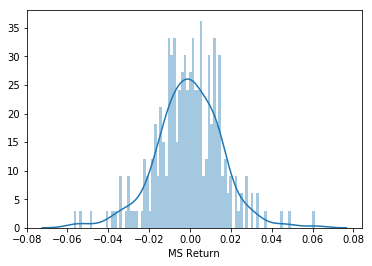

In [113]:
sns.distplot(returns['MS Return'].ix['2015-01-01':'2015-12-31'],bins=90)

** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

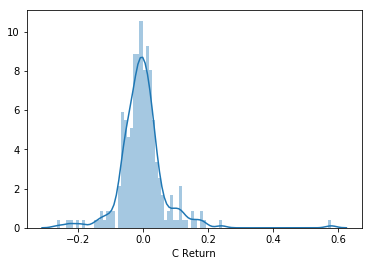

In [117]:
sns.distplot(returns['C Return'].ix['2008-01-01':'2008-12-31'],bins=90)

____
# More Visualization

A lot of this project will focus on visualizations.
### Imports

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


** Creating a line plot showing Close price for each bank for the entire index of time.**

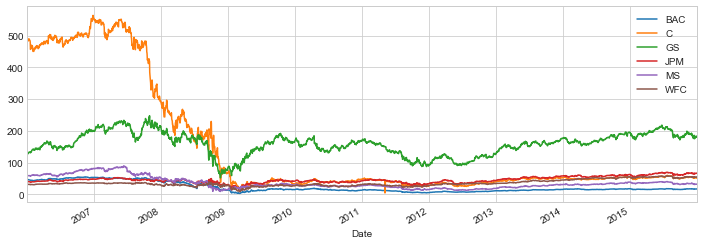

In [135]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

In [136]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info')

Bank Ticker    BAC       C      GS    JPM     MS    WFC
Date                                                   
2006-01-03   47.08  492.90  128.87  40.19  58.31  31.90
2006-01-04   46.58  483.80  127.09  39.62  58.35  31.53
2006-01-05   46.64  486.20  127.04  39.74  58.51  31.50
2006-01-06   46.57  486.20  128.84  40.02  58.57  31.68
2006-01-09   46.60  483.90  130.39  40.67  59.19  31.68
2006-01-10   46.21  485.40  132.03  40.73  59.22  31.65
2006-01-11   46.10  489.80  131.97  40.70  59.57  31.82
2006-01-12   45.80  490.30  132.25  39.95  59.47  31.44
2006-01-13   45.80  489.20  133.26  39.92  59.38  31.62
2006-01-17   45.31  484.30  132.59  39.71  58.81  31.30
2006-01-18   45.18  483.80  131.85  39.35  58.58  31.67
2006-01-19   45.14  479.40  133.82  39.06  59.35  31.30
2006-01-20   44.19  456.90  131.44  38.05  57.85  30.75
2006-01-23   43.96  460.00  132.87  38.27  58.48  30.80
2006-01-24   44.24  460.10  133.00  38.11  58.69  30.80
2006-01-25   44.63  462.30  133.56  38.48  59.17  31.00
2006-01-26   44.90  470.10  137.40  39.59  59.97  31.28
2006-01-27   44.80  468.70  138.94  39.75  60.78  31.35
2006-01-30   44.48  468.20  139.87  39.85  60.67  31.24
2006-01-31   44.23  465.80  141.25  39.75  61.45  31.18
2006-02-01   43.95  463.30  141.71  39.88  61.83  30.92
2006-02-02   43.44  451.80  142.52  39.99  61.27  30.65
2006-02-03   43.09  450.60  142.74  39.53  61.44  30.52
2006-02-06   43.37  451.70  142.82  39.44  61.73  30.52
2006-02-07   43.49  450.50  139.48  39.26  60.53  30.56
2006-02-08   43.67  453.60  141.14  39.60  61.27  30.66
2006-02-09   43.83  457.90  140.85  39.77  61.18  30.62
2006-02-10   43.92  459.60  140.81  39.92  60.31  30.86
2006-02-13   43.70  456.80  139.65  39.77  59.81  30.82
2006-02-14   44.16  461.20  141.78  40.10  60.07  31.32
...            ...     ...     ...    ...    ...    ...
2015-11-18   17.84   54.98  193.66  67.45  34.25  55.67
2015-11-19   17.69   55.06  193.03  67.66  34.17  55.97
2015-11-20   17.65   54.75  191.47  67.54  33.91  55.82
2015-11-23   17.47   54.28  189.19  66.88  33.64  55.60
2015-11-24   17.47   54.18  188.67  66.78  33.59  55.28
2015-11-25   17.44   54.08  189.15  66.86  33.61  55.22
2015-11-27   17.48   54.21  190.47  67.17  33.78  55.39
2015-11-30   17.43   54.09  190.02  66.68  34.30  55.10
2015-12-01   17.81   54.88  193.07  67.61  35.27  55.71
2015-12-02   17.62   54.14  190.26  66.66  34.89  55.08
2015-12-03   17.30   53.51  185.20  65.80  34.45  54.20
2015-12-04   17.80   55.09  189.99  67.89  35.32  55.67
2015-12-07   17.54   54.40  185.49  67.00  34.68  55.42
2015-12-08   17.19   53.39  182.92  65.96  34.06  54.40
2015-12-09   17.10   52.81  180.71  65.46  33.37  54.12
2015-12-10   17.20   52.65  182.11  65.61  33.42  54.34
2015-12-11   16.73   51.11  176.56  64.07  32.08  53.31
2015-12-14   16.80   51.10  176.40  64.27  31.88  53.20
2015-12-15   17.42   52.52  182.01  66.10  32.84  54.91
2015-12-16   17.75   53.90  186.21  67.53  33.61  55.85
2015-12-17   17.30   52.84  182.61  66.28  32.38  55.47
2015-12-18   16.76   51.21  175.49  64.40  31.29  53.79
2015-12-21   16.97   51.79  177.75  65.54  31.68  54.02
2015-12-22   17.08   52.01  180.05  65.68  32.22  54.34
2015-12-23   17.34   52.63  182.95  66.73  32.60  55.04
2015-12-24   17.27   52.71  182.47  66.60  32.48  54.82
2015-12-28   17.13   52.38  181.62  66.38  32.17  54.68
2015-12-29   17.28   52.98  183.53  67.07  32.55  55.29
2015-12-30   17.05   52.30  182.01  66.59  32.23  54.89
2015-12-31   16.83   51.75  180.23  66.03  31.81  54.36

[2517 rows x 6 columns]

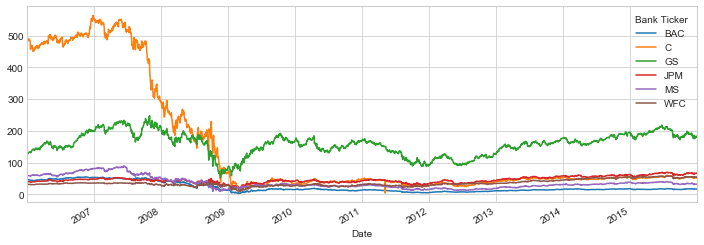

In [129]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [134]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

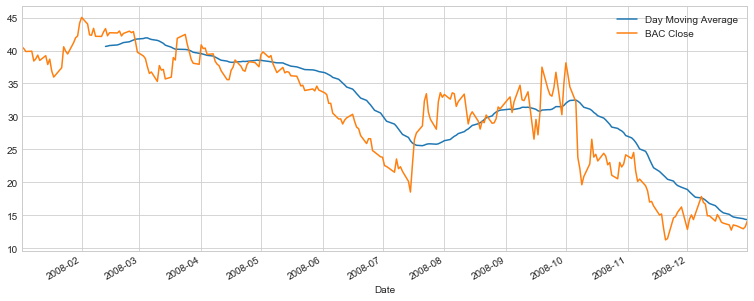

In [150]:
plt.figure(figsize=(13,5))
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = 'Day Moving Average')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

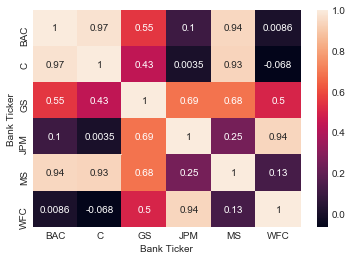

In [157]:
sns.heatmap(bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr(),annot = True)

** Using seaborn's clustermap to cluster the correlations together:**

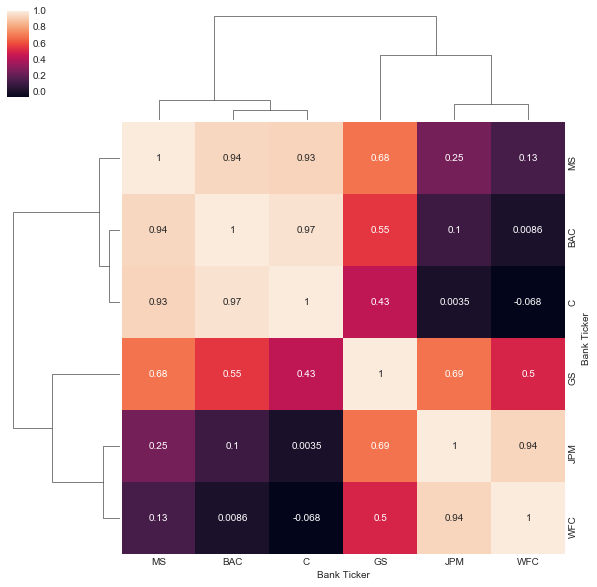

In [211]:
sns.clustermap(bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr(),annot = True)

** Using plotly's clustermap to cluster the correlations together:**

In [161]:
close_corr = bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr()

In [165]:
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

** Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [193]:
bac15 = bank_stocks['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']

In [200]:
bac15.iplot(kind='candle')

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [207]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma',periods = [13,21,55])

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [210]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all!